In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Importing the Credit Card Default Taiwan Dataset
dataset = pd.read_csv('/content/sample_data/defaultofcreditcardclients.csv')
dataset = dataset.sample(n = 30000,replace = False,random_state = 1)
print(dataset.shape)

(30000, 25)


In [ ]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10747,10748,310000.0,1,3,1,32,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12573,12574,10000.0,2,3,1,49,-1,-1,-2,-1,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29676,29677,50000.0,1,2,1,28,-1,-1,-1,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8856,8857,80000.0,2,3,1,52,2,2,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21098,21099,270000.0,1,1,2,34,1,2,0,0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 10747 to 29733
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                  

In [ ]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
dataset.index = dataset['ID']
dataset.drop('ID',axis=1,inplace=True)
dataset.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0


In [ ]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
#Checking if there is any null data
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
dataset['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
dataset['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay',
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


# Section 2: Correlation between Features

<Axes: title={'center': 'Correlation with Default'}>

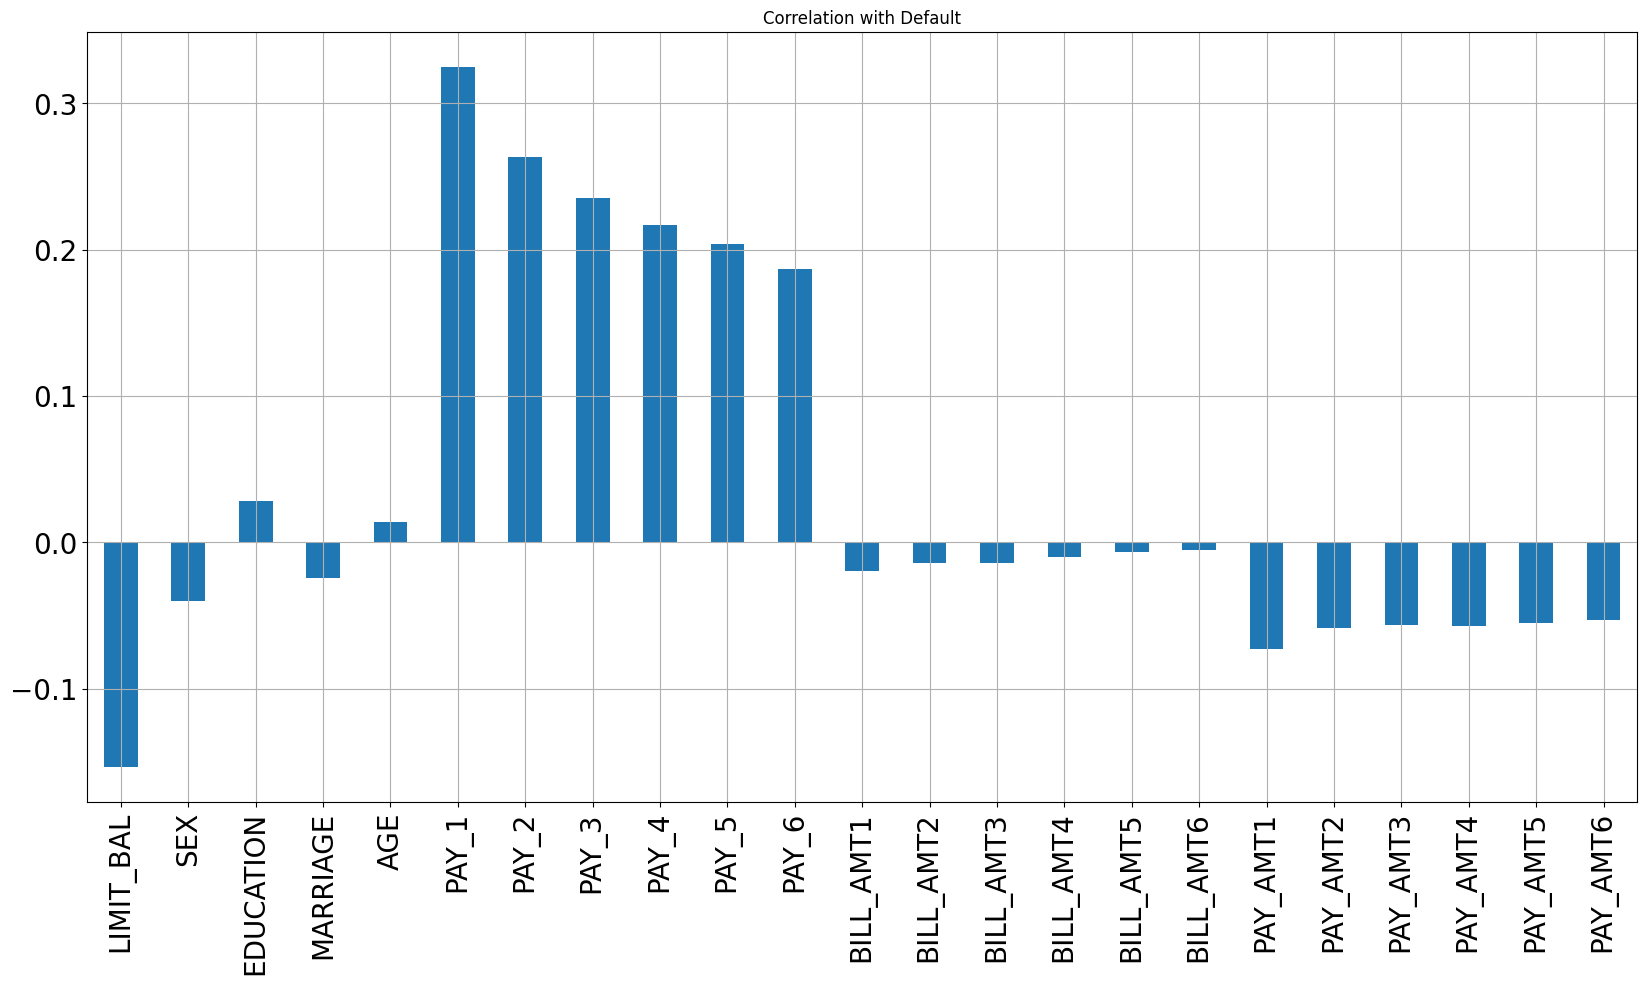

In [ ]:
# Analysing the correlation of features with  default_pay
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default",
                                        fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

# Section 3: Data Cleaning

In [ ]:
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [ ]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,-1,-1,-2,-1,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,-1,-1,-1,0,-1,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [ ]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [ ]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000.0,1,3,1,32,0,0,0,0,0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,10000.0,2,3,1,49,0,0,0,0,2,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,50000.0,1,2,1,28,0,0,0,0,0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,80000.0,2,3,1,52,2,2,3,3,3,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,270000.0,1,1,2,34,1,2,0,0,2,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 10748 to 29734
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PA

In [ ]:
dataset.SEX.nunique()

2

# Section 4: Data Preprocessing

### Standardization

In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

### One Hot Encoding

In [ ]:
# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  dataset[att] = dataset[att].astype('category')

# one-hot encoding
dataset=pd.concat([pd.get_dummies(dataset['SEX'], prefix='SEX'),
                pd.get_dummies(dataset['EDUCATION'], prefix='EDUCATION'),
                pd.get_dummies(dataset['MARRIAGE'], prefix='MARRIAGE'),
                dataset],axis=1)

# drop original columns
dataset.drop(['EDUCATION'],axis=1, inplace=True)
dataset.drop(['SEX'],axis=1, inplace=True)
dataset.drop(['MARRIAGE'],axis=1, inplace=True)


dataset.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1,0,0,0,1,0,1,0,0,310000.0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,0,1,0,0,1,0,1,0,0,10000.0,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,1,0,0,1,0,0,1,0,0,50000.0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,0,1,0,0,1,0,1,0,0,80000.0,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,1,0,1,0,0,0,0,1,0,270000.0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


# Section 5: Feature Scaling

In [ ]:
# remove features with correlation coefficent >= 0.93
#numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
#corr =  data[numeric].corr()
#upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
#print(to_drop) #['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
#data= data.drop(data[to_drop], axis = 1)

In [ ]:
dataset.head(5)

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1,0,0,0,1,0,1,0,0,310000.0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0
12574,0,1,0,0,1,0,1,0,0,10000.0,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1
29677,1,0,0,1,0,0,1,0,0,50000.0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0
8857,0,1,0,0,1,0,1,0,0,80000.0,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1
21099,1,0,1,0,0,0,0,1,0,270000.0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0


# Section 6: Train and Test Data Split

In [ ]:
#Training data 70%
#Test data 30%
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(21000, 29)
(21000,)
(9000, 29)
(9000,)


# Section 7: Machine Learning Algorithms for Classification

## Logistic Regression

In [ ]:
#Training the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
#Test the model
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.783111,0.0,0.0,0.0,0.499929


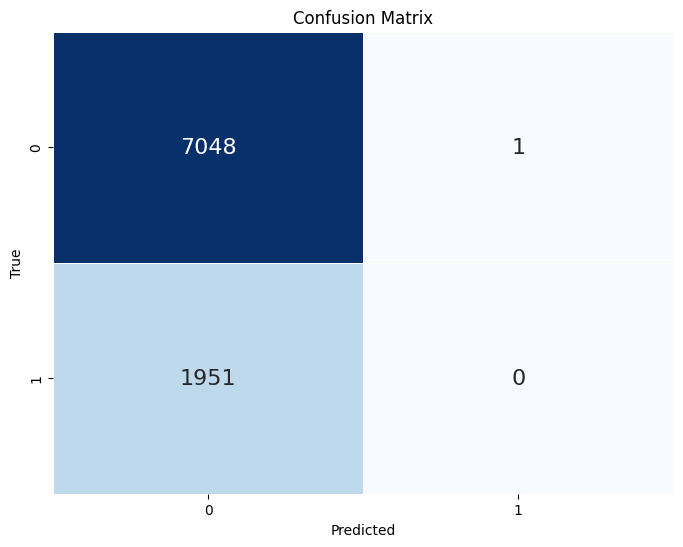

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('LogisticRegression-ConfusionMatrix.png')

K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate=[]
n_neighbours = [4, 5, 10, 20, 30, 35, 40, 50, 75, 100, 150, 200, 250, 300, 350, 500, 600]

for n in n_neighbours:
    knn = KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_n = knn.predict(X_test)
    error_rate.append(np.mean(pred_n != y_test))
print(error_rate)
# for i in range(1,100):

#     knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test))

[0.22666666666666666, 0.24388888888888888, 0.22377777777777777, 0.21877777777777777, 0.21733333333333332, 0.21966666666666668, 0.22011111111111112, 0.21966666666666668, 0.21977777777777777, 0.21766666666666667, 0.21644444444444444, 0.21711111111111112, 0.217, 0.21711111111111112, 0.21633333333333332, 0.2167777777777778, 0.2167777777777778]


Text(0, 0.5, 'Error Rate')

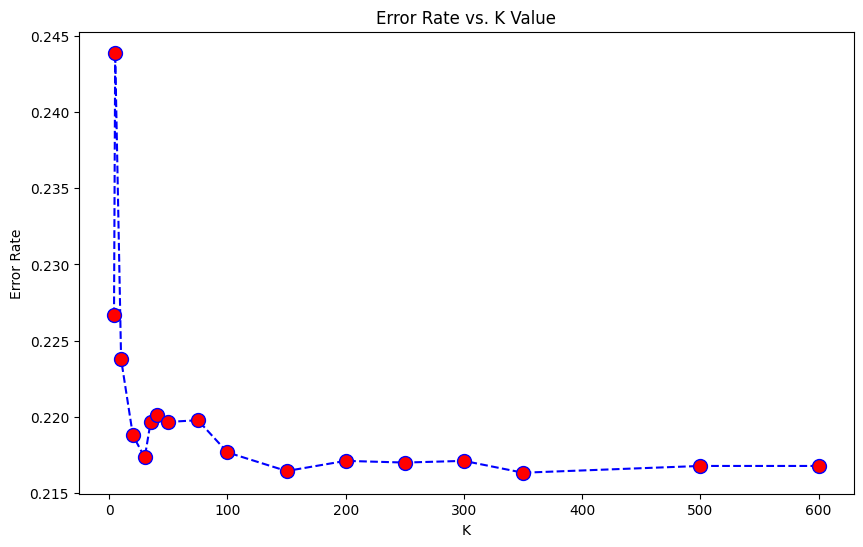

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(n_neighbours,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# plt.figure(figsize=(10,6))
# plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.780333,0.458599,0.073808,0.127152,0.524846


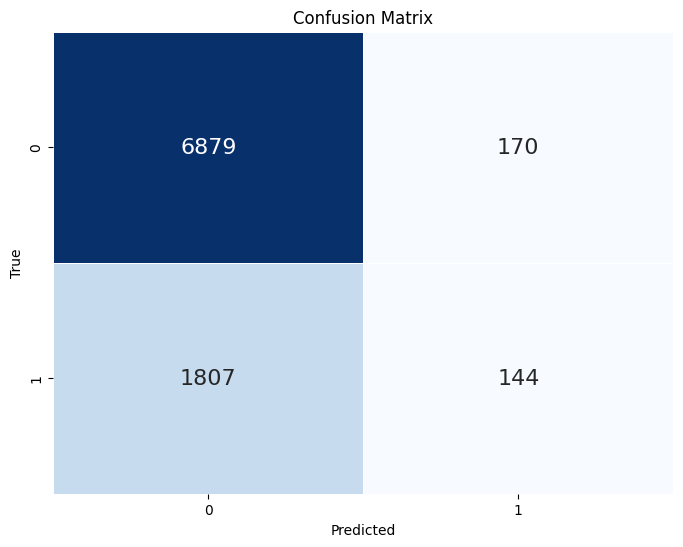

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classifier with Cross Validation

In [ ]:
#Cross validation for logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


accuracy = cross_val_score(logmodel, X, y, cv=15, scoring='accuracy')
precision = cross_val_score(logmodel, X, y, cv=15, scoring='precision')
recall = cross_val_score(logmodel, X, y, cv=15, scoring='recall')
f1 = cross_val_score(logmodel, X, y, cv=15, scoring='f1')
roc = cross_val_score(logmodel, X, y, cv=15, scoring=make_scorer(roc_auc_score))



print("Cross-Validation Scores for Logistic Regression:", accuracy)
print("Mean Accuracy:", np.mean(accuracy))
print("Mean Precision", np.mean(precision))
print("Mean Recall", np.mean(recall))
print("Mean f1 score", np.mean(f1))
print("Mean ROC", np.mean(roc))
print("Standard Deviation:", np.std(accuracy))

Cross-Validation Scores for Logistic Regression: [0.779  0.779  0.779  0.779  0.779  0.779  0.779  0.7785 0.779  0.7775
 0.7785 0.7785 0.7785 0.7785 0.7785]
Mean Accuracy: 0.7786999999999998
Mean Precision 0.0
Mean Recall 0.0
Mean f1 score 0.0
Mean ROC 0.4999357876653505
Standard Deviation: 0.0004000000000000225


In [ ]:
#Cross validation for K-Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors=50)

accuracy = cross_val_score(knn, X, y, cv=22, scoring=make_scorer(accuracy_score))
precision = cross_val_score(knn, X, y, cv=22, scoring=make_scorer(precision_score))
recall = cross_val_score(knn, X, y, cv=22, scoring=make_scorer(recall_score))
f1 = cross_val_score(knn, X, y, cv=22, scoring='f1')
roc = cross_val_score(knn, X, y, cv=22, scoring=make_scorer(roc_auc_score))



print("Cross-Validation Scores for K-Nearest Neighbors (KNN):", accuracy)
print("Mean Accuracy:", np.mean(accuracy))
print("Mean Precision", np.mean(precision))
print("Mean Recall", np.mean(recall))
print("Mean f1 score", np.mean(f1))
print("Mean ROC", np.mean(roc))
print("Standard Deviation:", np.std(accuracy))

Cross-Validation Scores for K-Nearest Neighbors (KNN): [0.78152493 0.78445748 0.77639296 0.77565982 0.77785924 0.78445748
 0.78225806 0.77932551 0.78225806 0.78005865 0.78152493 0.77639296
 0.78519062 0.77419355 0.77842993 0.77916361 0.78136464 0.78209831
 0.77402788 0.77989729 0.77769626 0.78356566]
Mean Accuracy: 0.7798999014789502
Mean Precision 0.5205757473416245
Mean Recall 0.06298841309622151
Mean f1 score 0.1122284813131135
Mean ROC 0.5232550351733462
Standard Deviation: 0.003219621994263172


In [ ]:
score=[]
score.append(np.mean(accuracy))
score.append(np.mean(precision))
score.append(np.mean(recall))
score.append(np.mean(f1))
score.append(np.mean(roc))
print("Cross-Validation Scores for K-Nearest Neighbors (KNN):", score)
print("Mean Accuracy:", np.mean(accuracy))
print("Standard Deviation:", np.std(accuracy))

Cross-Validation Scores for K-Nearest Neighbors (KNN): [0.7798999014789502, 0.5205757473416245, 0.06298841309622151, 0.1122284813131135, 0.5232550351733462]
Mean Accuracy: 0.7798999014789502
Standard Deviation: 0.003219621994263172


# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

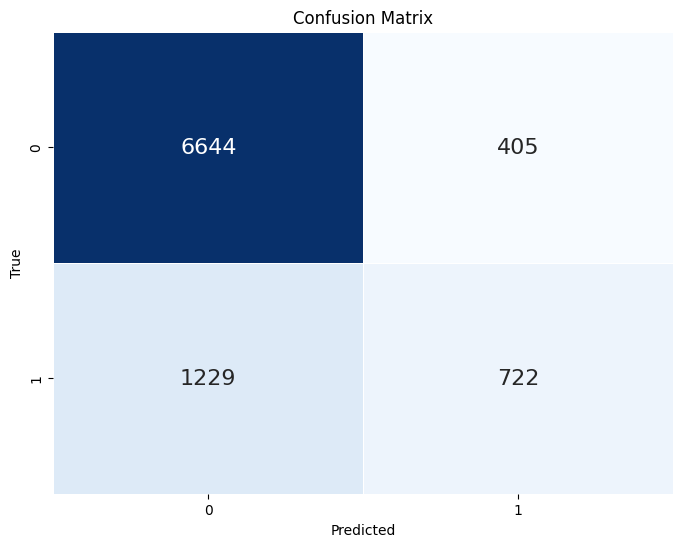

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.818444,0.640639,0.370067,0.469136,0.656306


# Support Vector Machine

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

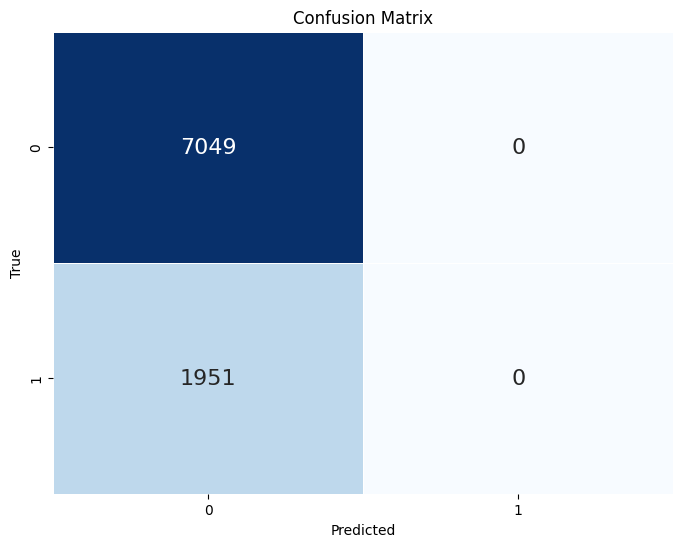

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.783222,0.0,0.0,0.0,0.5


In [ ]:
#!/usr/bin/python
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from BaseHTTPServer import BaseHTTPRequestHandler,HTTPServer

import urlparse

from random import randint
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import tensorflow and numpy
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

PORT_NUMBER = 8080

COLUMNS = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3",
           "BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","DEFAULT"
          ]

training_data_raw = np.genfromtxt('credit-card-default-training-data.csv',delimiter=',')
holdout_data_raw = np.genfromtxt('credit-card-default-holdout-data.csv',delimiter=',')

print ('Begining tensor flow session')

sess = tf.InteractiveSession()

#Create first 6 elements as input and last element as output into a [6xn] and [1xn] empty NP array

train_data = np.empty((len(training_data_raw) - 2, 24))
holdout_data = np.empty((len(holdout_data_raw) - 2, 24))
train_data_result = np.empty((len(training_data_raw) - 2, 1))
holdout_data_result = np.empty((len(holdout_data_raw) - 2, 1))

# First two rows are just labels so skip them
training_row_index = 0
holdout_row_index = 0
csv_row_index = 0

#Define normalization factors
nf_credit_amount = 250000
nf_payment_amount = 250000
nf_age = 60
nf_generic_factor = 7

#Populate the NP arrays with value from the file.

for row in training_data_raw:
    if((training_row_index == 0) or (training_row_index == 1)):
        training_row_index = training_row_index + 1
        continue
    j = 0
    #Populate the input. The last element is result, hence [:-1]
    for element in row[:-1]:
        #Normalize if needed
        if j == 0:
            j = j + 1
            continue
        elif j == 1:
            train_data[training_row_index-2][j-1] = float(element)/nf_credit_amount
        elif (j > 11 and j < 24):
            train_data[training_row_index-2][j-1] = float(element)/nf_payment_amount
        elif j == 5:
            train_data[training_row_index-2][j-1] = float(element)/nf_age
        else:
            train_data[training_row_index-2][j-1] = float(element)/nf_generic_factor
        j = j + 1
    #Populate the output
    train_data_result[training_row_index-2][0] = row[j]
    training_row_index =  training_row_index + 1

for row in holdout_data_raw:
    if((holdout_row_index == 0) or (training_row_index == 1)):
        holdout_row_index = holdout_row_index + 1
        continue
    j = 0
    #Populate the input. The last element is result, hence [:-1]
    for element in row[:-1]:
        #Normalize if needed
        if j == 0:
            j = j + 1
            continue
        elif j == 1:
            holdout_data[holdout_row_index-2][j-1] = float(element)/nf_credit_amount
        elif(j > 11 and j < 24):
            holdout_data[holdout_row_index-2][j-1] = float(element)/nf_payment_amount
        elif j == 5:
            holdout_data[holdout_row_index-2][j-1] = float(element)/nf_age
        else:
            holdout_data[holdout_row_index-2][j-1] = float(element)/nf_generic_factor
        j = j + 1
    #Populate the output
    holdout_data_result[holdout_row_index-2][0] = row[j]
    holdout_row_index =  holdout_row_index + 1

#print('Printing training data')
#print (train_data)

#print('Printing training data results')
#print(train_data_result)

#print('Printing holdout data')
#print (holdout_data)

#print('Printing holdout data results')
#print(holdout_data_result)

# Functions to initialize weights and biases randomly to avoid exploding gradient and dimishing gradient problem

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# Start model implementation

# Create the input tensor of [infinite, 6] dimension
x = tf.placeholder(tf.float32, [None, 24])

# Create weights and bias tensor variables for the first layer with 6 inputs and 4 outputs

Wx = weight_variable([24, 20])
bx = bias_variable([20])

# Defind the equation with activation function for the first layer to be RELU

hi = tf.nn.relu(tf.matmul(x, Wx) + bx)

# Create weights and bias tensor variables for the second layer with 4 inputs and 1 output

Whi = weight_variable([20, 10])
bhi = bias_variable([10])

# Defind the equation with activation function for the first layer to be RELU

h1 = tf.nn.relu(tf.matmul(hi, Whi) + bhi)

# Create weights and bias tensor variables for the second layer with 4 inputs and 1 output

Wh1 = weight_variable([10, 1])
bh1 = bias_variable([1])

# Defind the equation with activation function for the first layer to be RELU

h2 = tf.nn.relu(tf.matmul(h1, Wh1) + bh1)

# Create weights and bias tensor variables for the second layer with 4 inputs and 1 output

Wh2 = weight_variable([16, 1])
bh2 = bias_variable([1])

# Defind the activation function for the second layer to simply output a number based on weights and biases

y = tf.nn.relu(tf.matmul(h1, Wh1) + bh1)

# Define loss and optimizer

# Estimated output is an infinite tensor of single dimension
y_ = tf.placeholder(tf.float32, [None, 1])

# Cross entropy is based on L2 loss. [(y-y_)exp2/2*input samples_count]. Reduce index 1 because 0 is just the index of the output tensor
cross_entropy = tf.reduce_sum(tf.pow(y - y_, 2), reduction_indices = [1])/(len(train_data)) #L2 loss

# Learning rate control variable is 0.75. Found through iteration starting from a low value. Big value resulted in missed minima
train_step = tf.train.GradientDescentOptimizer(0.75).minimize(cross_entropy)

# Train
tf.global_variables_initializer().run()

train_index = 0

print('Training start')

# Do batch gradient descent by taking two samples in each step

training_batch_size = 100

for i in range(9000):
    train_data_batch = np.empty((training_batch_size,24))
    train_data_result_batch = np.empty((training_batch_size,1))

    #Select random 100 samples and populate them
    for batch_index in range(training_batch_size):
        train_index = randint(0, len(train_data) - 1)
        train_data_result_batch[batch_index][0] = train_data_result[train_index]
        row = train_data[train_index]
        j = 0
        for element in row:
            train_data_batch[batch_index][j] = element
            j = j + 1

    #print(train_data_batch)
    #print(train_data_result_batch)

    train_step.run({x: train_data_batch, y_: train_data_result_batch})

    if i % training_batch_size == 0:
        print("Iteration =", i)

print('Training complete')

holdout_index = 0

# Set the threshold for the default risk
default_risk_threshold = 0.20
TP = 0
FP = 0
TN = 0
FN = 0

# Calculate TP, TN, FP, FN

risk = [None] * len(holdout_data_result)

for i in range(len(holdout_data)):
    holdout_data_batch = np.empty((1,24))

    row = holdout_data[i]

    j = 0
    for element in row:
        holdout_data_batch[0][j] = element
        j = j + 1

    #print('Holdout data = %s' % holdout_data[i])
    #print('Input = %s' % holdout_data_batch)

    get_risk = y
    risk_score = get_risk.eval({x: holdout_data_batch})
    risk[i] = risk_score[0][0]

    #print('Predicted Risk = %s - Real Risk = %s' % (risk[i],holdout_data_result[i][0]))

    if ((risk[i] > default_risk_threshold) and (holdout_data_result[i][0] == 1)):
        TP = TP + 1
    elif ((risk[i] > default_risk_threshold) and (holdout_data_result[i][0] == 0)):
        FP = FP + 1
    elif ((risk[i] < default_risk_threshold) and (holdout_data_result[i][0] == 1)):
        FN = FN + 1
    elif ((risk[i] < default_risk_threshold) and (holdout_data_result[i][0] == 0)):
        TN = TN + 1


# lets calculate accuracy to be how many true positives we got right
precision = float(TP)/(TP + FP)
recall = float(TP)/(TP + FN)
accuracy = float(TP)/(TP + FN)
print('Accuracy = %s \nPrecision = %s \nRecall = %s \nTP = %s \nFP = %s \nTN = %s\nFN = %s' % (accuracy, precision, recall, TP, FP, TN, FN))

plot_against_index = 3

if (plot_against_index != -1):
    plot_against_data = [None] * len(holdout_data)
    risk_data = [None] * len(holdout_data_result)

    for i in range(len(holdout_data)):
        risk_data[i] = risk[i];
        plot_against_data[i] = holdout_data[i][plot_against_index];

    plot_against_data, risk_data = zip(*sorted(zip(plot_against_data, risk_data)))

    plot_against_data, risk_data = (list(t) for t in zip(*sorted(zip(plot_against_data, risk_data))))

    #plt.figure()
    #plt.plot(plot_against_data, risk_data, 'ro', label='Default Risk')
    #plt.legend()
    #plt.show()

    xy = np.vstack([plot_against_data,risk_data])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(plot_against_data, risk_data, c=z, s=100, edgecolor='')

    plt.xlabel(COLUMNS[plot_against_index])
    plt.ylabel('Default')

    plt.show()




#This class will handles any incoming request from
#the browser
class myHandler(BaseHTTPRequestHandler):

	#Handler for the GET requests
	def do_GET(self):
		self.send_response(200)
		self.send_header('Content-type','text/html')
		self.end_headers()
		# Send the html message
		path = self.path
		params = path.replace('/?', '')
		params_array = params.split('&')

		request_data = np.empty((1,6))

		for element in params_array:
			if 'x1' in element:
				request_data[0][0] = float(element.replace('x1=',''))
			if 'x2' in element:
				request_data[0][1] = float(element.replace('x2=',''))
			if 'x3' in element:
				request_data[0][2] = float(element.replace('x3=',''))
			if 'x4' in element:
				request_data[0][3] = float(element.replace('x4=',''))
			if 'x5' in element:
				request_data[0][4] = float(element.replace('x5=',''))
			if 'x6' in element:
				request_data[0][5] = float(element.replace('x6=',''))
			if 'x7' in element:
				request_data[0][6] = float(element.replace('x7=',''))
			if 'x8' in element:
				request_data[0][7] = float(element.replace('x8=',''))
			if 'x9' in element:
				request_data[0][8] = float(element.replace('x9=',''))
			if 'x10' in element:
				request_data[0][9] = float(element.replace('x10=',''))
			if 'x11' in element:
				request_data[0][10] = float(element.replace('x11=',''))
			if 'x12' in element:
				request_data[0][11] = float(element.replace('x12=',''))
			if 'x13' in element:
				request_data[0][12] = float(element.replace('x13=',''))
			if 'x14' in element:
				request_data[0][13] = float(element.replace('x14=',''))
			if 'x15' in element:
				request_data[0][14] = float(element.replace('x15=',''))
			if 'x16' in element:
				request_data[0][15] = float(element.replace('x16=',''))
			if 'x17' in element:
				request_data[0][16] = float(element.replace('x17=',''))
			if 'x18' in element:
				request_data[0][17] = float(element.replace('x18=',''))
			if 'x19' in element:
				request_data[0][18] = float(element.replace('x19=',''))
			if 'x20' in element:
				request_data[0][19] = float(element.replace('x20=',''))
			if 'x21' in element:
				request_data[0][20] = float(element.replace('x21=',''))
			if 'x22' in element:
				request_data[0][21] = float(element.replace('x22=',''))
			if 'x23' in element:
				request_data[0][22] = float(element.replace('x23=',''))
			if 'x24' in element:
				request_data[0][23] = float(element.replace('x24=',''))

		get_risk = y
		risk_score = get_risk.eval({x: request_data})
		risk = str(risk_score[0][0])
		self.wfile.write(risk)
		return

try:
	#Create a web server and define the handler to manage the
	#incoming request
	server = HTTPServer(('', PORT_NUMBER), myHandler)
	print ('Started httpserver on port ' , PORT_NUMBER)

	#Wait forever for incoming htto requests
	#server.serve_forever()

except KeyboardInterrupt:
	print ('^C received, shutting down the web server')
	server.socket.close()


ModuleNotFoundError: ignored